In [6]:
addpath('C:\Users\Pietro\Documents\tp4-exercises\matlab')

In [69]:
Nss = 0.1;
w0 = 1;
G = 0.5;
K = 0.5;
gc = 2;

In [4]:
Nc = 2;

In [70]:
startTime = stopWatch();
id0   = speye(Nc,Nc);                       % I
id1 = speye(4,4);
a0    = kron(id0,spdiags(sqrt(0:(Nc-1)).',1,Nc,Nc));  % a
a     = kron(a0,id1);                       % a  ⊗  I
at    = kron(id1,a0);                       % I  ⊗  a   (tilde-a)
id    = kron(id1,id1);                      % I  ⊗  I
aDag  = a';                                 % a† ⊗  I
atDag = at';                                % I  ⊗  a†  (tilde-a†)
N     = aDag*a;                             % N  ⊗  I
Nt    = atDag*at;                           % I  ⊗  N   (tilde-N)
sigma_z = kron(kron([1 0; 0 -1],id0),id1);            % σz ⊗  I
sigma_p = kron(kron([0 1; 0 0],id0),id1);
sigma_m = kron(kron([0 0; 1 0],id0),id1);
sigma_zt = kron(id1,kron([1 0; 0 -1],id0));           % I  ⊗  σz
sigma_pt = kron(id1,kron([0 1; 0 0],id0));
sigma_mt = kron(id1,kron([0 0; 1 0],id0));
stopWatch(startTime,'  [info] Fields construction in ');

  [info] Fields construction in 00:00:00.010


In [71]:
startTime = stopWatch();
% Explicit form:
L = - 1i.*w0.*( N - Nt + sigma_z./2 - sigma_zt./2 + gc.*(a*sigma_p + aDag*sigma_m - at*sigma_pt - atDag*sigma_mt)) ...
    + K.*(1 + Nss).*( a   *at    - aDag*a./2 - atDag*at./2 ) ...
    + K.*Nss.*( aDag*atDag - a*aDag./2 - at*atDag./2 ) ...
    + G.*(1 + Nss).*( sigma_m *sigma_mt - sigma_p*sigma_m./2 - sigma_pt*sigma_mt./2 ) ...
    + G.*Nss.*( sigma_p*sigma_pt - sigma_m*sigma_p./2 - sigma_mt*sigma_pt./2 );

stopWatch(startTime,'  [info] Lindbladian construction in ');

  [info] Lindbladian construction in 00:00:00.002


In [72]:
[pss,~] = eigs(L ,1,0);
[I  ,~] = eigs(L',1,0);
I = I';
% Normalize

I

I = 
  Columns 1 through 8

   0.5000 - 0.0000i   0.0000 + 0.0000i  -0.0000 + 0.0000i  -0.0000 - 0.0000i  -0.0000 + 0.0000i   0.5000 + 0.0000i   0.0000 + 0.0000i  -0.0000 + 0.0000i

  Columns 9 through 16

  -0.0000 - 0.0000i   0.0000 + 0.0000i   0.5000 - 0.0000i  -0.0000 + 0.0000i   0.0000 - 0.0000i   0.0000 - 0.0000i  -0.0000 - 0.0000i   0.5000 - 0.0000i

In [75]:
stateIdx     = 1;
Geff         = 0.5;         % effective loss rate
tSpan        = [0 5./Geff];       % up to 5 characteristic times
p0           = zeros(4^2,1);
p0(stateIdx) = 1;                 % density matrix in |1,1> or |10,10> pure state (with Nc = 50)
p0           = p0./(I*p0);        % bi-normalize against left vacuum
[tVec,pT]    = ode45(@(t,v) L*v, tSpan, p0);
pT           = pT.';              % time steps as cols of pT

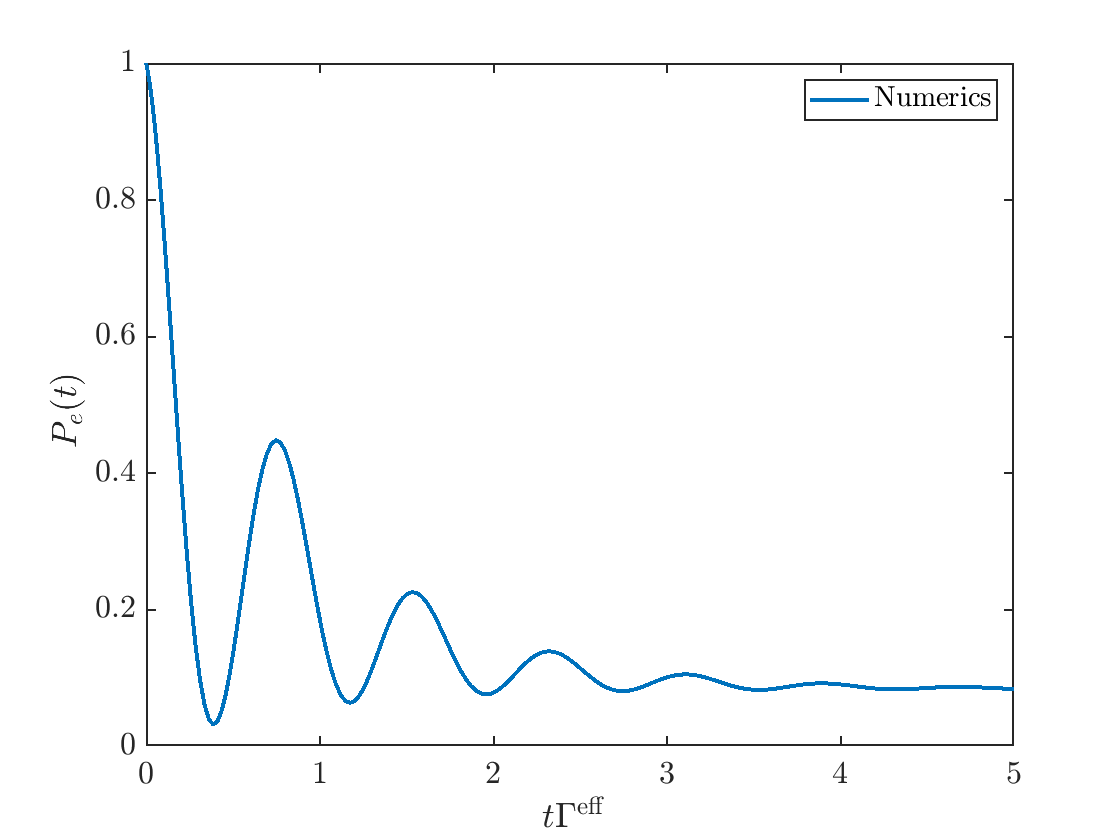

In [82]:
magicLaTeX;
figure;
ee = kron(kron([1 0; 0 0],id0),id1);
plot(tVec.*Geff,real(I*ee*pT),'DisplayName','Numerics'); hold on;
legend;
xlabel(' $t\Gamma^{\mathrm{eff}}$ ');
ylabel(' $P_e(t)$ ');